#  ANOVA <hr style="border:2.5px solid #126782"></hr>

Data Analyst: Gyro A. Madrona<br>
Department: Electrical Engineering

In [228]:
#%pip install pingouin --upgrade

In [1]:
# imports and packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import pingouin as pg

In [2]:
# load dataset
df = pd.read_csv(r"raw\hydroelectric-sample.csv",
                 delimiter=',')
df

,Plant_1,Plant_2,Plant_3
0,1826,1646,1815
1,1644,1808,1777
2,1771,1865,1854
3,2007,1802,1627
4,1812,1828,1872
...,...,...,...
245,1822,1566,1761
246,1921,1699,1659
247,1585,2052,1820
248,1779,1726,2027


In [31]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 249
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Plant_1  246 non-null    int64
 1   Plant_2  246 non-null    int64
 2   Plant_3  246 non-null    int64
dtypes: int64(3)
memory usage: 7.7 KB


In [32]:
# summary of statistics
df.describe()

,Plant_1,Plant_2,Plant_3
count,246.000000,246.000000,246.000000
mean,1796.382114,1806.365854,1789.105691
std,126.538694,124.805237,125.573708
min,1490.000000,1477.000000,1422.000000
25%,1713.250000,1716.000000,1700.500000
50%,1786.500000,1802.500000,1789.000000
75%,1886.500000,1884.000000,1866.750000
max,2152.000000,2165.000000,2143.000000


# Data Cleaning

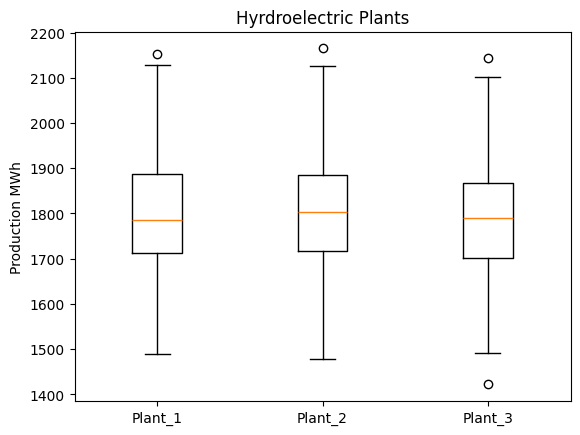

In [30]:
# check for 3-sigma outliers
plt.boxplot(df[['Plant_1','Plant_2','Plant_3']],
            tick_labels=df.columns)
plt.title("Hyrdroelectric Plants")
plt.ylabel("Production MWh")
plt.show()

In [27]:
# Plant 1
p1_z = stats.zscore(df['Plant_1'])
p1_outliers = (p1_z < -3) | (p1_z > 3)
df = df[~p1_outliers]

In [29]:
# Plant 2
p2_z = stats.zscore(df['Plant_2'])
p2_outliers = (p2_z < -3) | (p2_z > 3)
df = df[~p2_outliers]

In [23]:
# Plant 3
p3_z = stats.zscore(df['Plant_3'])
p3_outliers = (p3_z < -3) | (p3_z > 3)
df = df[~p3_outliers]

In [237]:
#df.to_csv(r"raw\hydroelectric-sample-cleaned.csv",
#          index=False)

# Normality Test

In [33]:
# load dataset
df = pd.read_csv(r"raw\hydroelectric-sample-cleaned.csv")
df

,Plant_1,Plant_2,Plant_3
0,1826,1646,1815
1,1644,1808,1777
2,1771,1865,1854
3,2007,1802,1627
4,1812,1828,1872
...,...,...,...
241,1822,1566,1761
242,1921,1699,1659
243,1585,2052,1820
244,1779,1726,2027


In [34]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Plant_1  246 non-null    int64
 1   Plant_2  246 non-null    int64
 2   Plant_3  246 non-null    int64
dtypes: int64(3)
memory usage: 5.9 KB


In [35]:
# summary of statistics
df.describe()

,Plant_1,Plant_2,Plant_3
count,246.000000,246.000000,246.000000
mean,1796.382114,1806.365854,1789.105691
std,126.538694,124.805237,125.573708
min,1490.000000,1477.000000,1422.000000
25%,1713.250000,1716.000000,1700.500000
50%,1786.500000,1802.500000,1789.000000
75%,1886.500000,1884.000000,1866.750000
max,2152.000000,2165.000000,2143.000000


In [ ]:
# Plant 1
# anderson-darling normality test
a2_stat, critical, alpha = stats.anderson(df['Plant_1'])
print(a2_stat)
print(critical)
print(alpha)

0.3584110683611357
[0.567 0.646 0.775 0.904 1.075]
[15.  10.   5.   2.5  1. ]


In [39]:
# verdict
if a2_stat > critical[2]:
    # reject null hypothesis
    print("Non-normal data")
else:
    # fail to reject null hypothesis
    print("Normal data")

Normal data


In [40]:
# Plant 2
# anderson-darling normality test
a2_stat, critical, alpha = stats.anderson(df['Plant_2'])

# verdict
if a2_stat > critical[2]:
    # reject null hypothesis
    print("Non-normal data")
else:
    # fail to reject null hypothesis
    print("Normal data")

Normal data


In [41]:
# Plant 3
# anderson-darling normality test
a2_stat, critical, alpha = stats.anderson(df['Plant_3'])

# verdict
if a2_stat > critical[2]:
    # reject null hypothesis
    print("Non-normal data")
else:
    # fail to reject null hypothesis
    print("Normal data")

Normal data


# Bartlett's Test

In [ ]:
# hypothesis
# Ho: equal variances
# Ha: unequal variances

b_stat, p_value =  stats.bartlett(df['Plant_1'],
                                  df['Plant_2'],
                                  df['Plant_3'])
p_value

np.float64(0.5647236550913752)

In [43]:
# verdict
alpha = 0.05
if p_value <= alpha:
    # reject null hypothesis
    print("Unequal variances")
else:
    # fail to reject null hypothesis
    print("Equal variances")

Equal variances


# One-Way ANOVA

In [44]:
# hypothesis
# Ho:equal means
# Ha: at least one is not equal

f_stat, p_value = stats.f_oneway(df['Plant_1'],
                                 df['Plant_2'],
                                 df['Plant_3'])
p_value

np.float64(0.31089261378072164)

In [46]:
# verdict
alpha = 0.05
if p_value <= alpha:
    # reject null hypothesis
    print("At least 1 hyrdroelectric plant is different")
else:
    # fail to reject null hypothesis
    print("There is no significant difference between hydroelectric plants.")

There is no significant difference between hydroelectric plants.


# Welch's ANOVA

note: assuming unequal variances

In [ ]:
# stack data
df_stack = pd.melt(df,
                   value_vars = ['Plant_1','Plant_2','Plant_3'],
                   var_name = 'Plant',
                   value_name = 'MWh').reset_index(drop=True)
df_stack

,Plant,MWh
0,Plant_1,1826
1,Plant_1,1644
2,Plant_1,1771
3,Plant_1,2007
4,Plant_1,1812
...,...,...
733,Plant_3,1761
734,Plant_3,1659
735,Plant_3,1820
736,Plant_3,2027


In [ ]:
# Hypothesis
# Ho:equal means
# Ha: at least one is not equal
result = pg.welch_anova(
    dv = 'MWh',
    between = 'Plant',
    data = df_stack
)
result

,Source,ddof1,ddof2,F,p-unc,np2
0,Plant,2,489.984424,1.177631,0.308878,0.003174


In [50]:
# extract p-value
p_value = result['p-unc'].values[0]
p_value

np.float64(0.3088776080487351)

In [51]:
# verdict
alpha = 0.05
if p_value <= alpha:
    # reject null hypothesis
    print("At least 1 hyrdroelectric plant is different")
else:
    # fail to reject null hypothesis
    print("There is no significant difference between hydroelectric plants.")

There is no significant difference between hydroelectric plants.
